# Loan Prediction (Taiwan)

In [87]:
import numpy as np 
import pandas as pd
from FairnessEvaluator import FairnessEvaluator

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [88]:
data = pd.read_excel('/Users/Air/iCloud Drive (Archive)/Documents/УКУ/default of credit card clients.xls')
y = data['Y'].to_numpy()
data['label_value'] = y
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X16,X17,X18,X19,X20,X21,X22,X23,Y,label_value
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
3,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
4,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0


In [79]:
pd.crosstab(data.Y[1:],data['X2'])

X2,1,2
Y,,
0,9015,14349
1,2873,3763


In [31]:
(9015+2873)/300

39.626666666666665

In [32]:
len(data[data.Y==1])/len(data)

0.22119262691243624

In [33]:
2873/(2873+9015)

0.2416722745625841

In [34]:
3763/(3763+14349)

0.20776280918727916

In [89]:
data['X2'] = data.X2.map(lambda x: 1 if x==1 else 0)

In [90]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X16,X17,X18,X19,X20,X21,X22,X23,Y,label_value
0,ID,LIMIT_BAL,0,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,default payment next month
1,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
2,2,120000,0,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
3,3,90000,0,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
4,4,50000,0,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,1


In [91]:
df = data.iloc[1: , :]
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X16,X17,X18,X19,X20,X21,X22,X23,Y,label_value
1,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
2,2,120000,0,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
3,3,90000,0,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
4,4,50000,0,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,1


In [92]:
for col in df:
  print(col, df[col].unique())

Unnamed: 0 [1 2 3 ... 29998 29999 30000]
X1 [20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]
X2 [0 1]
X3 [2 1 3 5 4 6 0]
X4 [1 2 3 0]
X5 [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
X6 [2 -1 0 -2 1 3 4 8 7 5 6]
X7 [2 0 -1 -2 3 5 7 4 1 6 8]
X8 [-1 0 2 -2 3 4 6 7 1 5 8]
X9 [-1 0 -2 2 3 4 5 7 6 1 8]
X10 [-2 0 -1 2 3 5 4 7 8 6]
X11 [-2 2 0 -1 3 6 4 7 8 5]
X

In [95]:
fo = FairnessEvaluator(df.reset_index(),
                      'label_value',
                      'X2',
                      metrics=['fpr','fnr', 'tpr'],
                      metrics_to_plot=['fnr','fpr', 'prec'],
                      fully_constrained=False,
                      precision_ub = 0.7,
                      #metric_fairness_bounds={'tpr': [0.99,1.01]}
                      )       
df = fo.evaluate()
print(df)

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 23364 small elements
Coin0506I Presolve 0 (-2) rows, 0 (-30000) columns and 0 (-36636) elements
Clp0000I Optimal - objective value 1050
Coin0511I After Postsolve, objective 1050, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1050 - 0 iterations time 0.182, Presolve 0.18, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables
Total time (CPU seconds):       0.45   (Wallclock seconds):       1.38



ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [44]:
df['SexMar'] = df.apply(lambda x:str(x['X2'])+'_'+str(x['X4']) ,axis=1)
df

/var/folders/mr/rk8jvb8d45z63grsh03yvfw40000gn/T/ipykernel_72270/2318067336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SexMar'] = df.apply(lambda x:str(x['X2'])+'_'+str(x['X4']) ,axis=1)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X17,X18,X19,X20,X21,X22,X23,Y,label_value,SexMar
1,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1,0_1
2,2,120000,0,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,0_2
3,3,90000,0,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,0_2
4,4,50000,0,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,0_1
5,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,0,1_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,0,1_1
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,0,1_2
29998,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,1,1_2
29999,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,1,1_1


In [45]:
for i,value in enumerate(df.SexMar.unique()):
    df.SexMar = df.SexMar.map(lambda x: i if x==value else x)
    value_list = value.split('_')
    print(f'Gender {value_list[0]} + Marriage {value_list[1]} => {i}')
df.SexMar = df.SexMar.astype(int)

Gender 0 + Marriage 1 => 0
Gender 0 + Marriage 2 => 1
Gender 1 + Marriage 1 => 2
Gender 1 + Marriage 2 => 3
Gender 0 + Marriage 3 => 4
Gender 0 + Marriage 0 => 5
Gender 1 + Marriage 3 => 6
Gender 1 + Marriage 0 => 7


/var/folders/mr/rk8jvb8d45z63grsh03yvfw40000gn/T/ipykernel_72270/273033193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SexMar = df.SexMar.map(lambda x: i if x==value else x)
/var/folders/mr/rk8jvb8d45z63grsh03yvfw40000gn/T/ipykernel_72270/273033193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SexMar = df.SexMar.astype(int)


In [46]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X17,X18,X19,X20,X21,X22,X23,Y,label_value,SexMar
1,1,20000,0,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,1,0
2,2,120000,0,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,1
3,3,90000,0,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,1
4,4,50000,0,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,15980,8500,20000,5003,3047,5000,1000,0,0,2
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,0,1837,3526,8998,129,0,0,0,0,3
29998,29998,30000,1,2,2,37,4,3,2,-1,...,19357,0,0,22000,4200,2000,3100,1,1,3
29999,29999,80000,1,3,1,41,1,-1,0,0,...,48944,85900,3409,1178,1926,52964,1804,1,1,2


In [47]:
fo = FairnessEvaluator(df,
                      'label_value',
                      'SexMar', # sex
                      metrics=['fpr','fnr', 'tpr'],
                      metrics_to_plot=['fpr','fnr','prec'],
                      #metric_fairness_bounds={'tpr':[0.9,1.1]},
                      fully_constrained=False,
                      precision_ub = 0.7)        
df = fo.evaluate()

IndexError: list index out of range

# Portugese


In [49]:
data = pd.read_csv('/Users/Air/iCloud Drive (Archive)/Documents/УКУ/NY/Week 3/X.csv', sep=',')
y = data['G3'].to_numpy()
data['label_value'] = y
data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,label_value
0,0,1,0,18,1,1,0,4,4,2,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1,1,0,17,1,1,1,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,2,1,0,15,1,0,1,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,3,1,0,15,1,1,1,4,2,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,4,1,0,16,1,1,1,3,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [50]:
for col in data:
  print(col, data[col].unique())

Unnamed: 0 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

In [20]:
pd.crosstab(data.G3,data['sex'])

sex,0,1
G3,,
0,333,216
1,50,50


In [22]:
(333+50)/(333+50+216+50)*100

59.01386748844376

In [23]:
100/(333+50+216+50)

0.15408320493066255

In [24]:
50/(333+50)

0.13054830287206268

In [25]:
50/(216+50)

0.18796992481203006

In [26]:
0.131-0.188


-0.056999999999999995

In [51]:
fo = FairnessEvaluator(data,
                      'G3',
                      'sex', # sex
                      metrics=['fpr','fnr', 'tpr'],
                      metrics_to_plot=['fpr','fnr','prec'],
                      #metric_fairness_bounds={'tpr':[0.9,1.1]},
                      fully_constrained=False,
                      precision_ub = 0.7)        
df = fo.evaluate()

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 549 small elements
Coin0506I Presolve 0 (-2) rows, 0 (-649) columns and 0 (-749) elements
Clp0000I Optimal - objective value 22.4
Coin0511I After Postsolve, objective 22.4, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 22.4 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 7.27798e-08 - average 1.03

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 1.0516e-12 - average 1.50229e-13, 0 fixed columns
Coin0506I Presolve 7 (0) rows, 3 (0) columns and 16 (0) elements
Clp0006I 0  Obj 44.8 Dual inf 200 (2)
Clp0029I End of values pass after 3 iterations
Clp0000I Optimal - objective value 44.8
Clp0000I Optimal - objective value 44.8
Clp0000I Optimal - objective value 44.8
Coin0511I After Postsolve, objective 44.8, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 44.8 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 3 columns (3 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.000 seconds, density: 0.000%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
C

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 2.86221e-07 - average 4.08888e-08, 0 fixed columns
Coin0506I Presolve 7 (0) rows, 3 (0) columns and 16 (0) elements
Clp0006I 0  Obj 67.9 Dual inf 200 (2)
Clp0029I End of values pass after 3 iterations
Clp0000I Optimal - objective value 67.9
Clp0000I Optimal - objective value 67.9
Clp0000I Optimal - objective value 67.9
Coin0511I After Postsolve, objective 67.9, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 67.9 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 3 columns (3 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.000 seconds, density: 0.000%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated


/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 2.8622e-07 - average 4.08886e-08, 0 fixed columns
Coin0506I Presolve 7 (0) rows, 3 (0) columns and 16 (0) elements
Clp0006I 0  Obj 90.3 Dual inf 200 (2)
Clp0029I End of values pass after 3 iterations
Clp0000I Optimal - objective value 90.3
Clp0000I Optimal - objective value 90.3
Clp0000I Optimal - objective value 90.3
Coin0511I After Postsolve, objective 90.3, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 90.3 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 3 columns (3 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.000 seconds, density: 0.000%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
C

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 14 (-2233) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-6) rows, 0 (-3) columns and 0 (-14) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (3 integer (0 of which binary)) and 14 elements
Coin3009W Conflict graph built in 0.000 seconds, density

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 14 (-2233) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-6) rows, 0 (-3) columns and 0 (-14) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (3 integer (0 of which binary)) and 14 elements
Coin3009W Conflict graph built in 0.000 seconds, density

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 14 (-2233) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-6) rows, 0 (-3) columns and 0 (-14) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (3 integer (0 of which binary)) and 14 elements
Coin3009W Conflict graph built in 0.000 seconds, density

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 14 (-2233) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-6) rows, 0 (-3) columns and 0 (-14) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (3 integer (0 of which binary)) and 14 elements
Coin3009W Conflict graph built in 0.000 seconds, density

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 14 (-2233) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-6) rows, 0 (-3) columns and 0 (-14) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (3 integer (0 of which binary)) and 14 elements
Coin3009W Conflict graph built in 0.000 seconds, density

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 14 (-2233) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-6) rows, 0 (-3) columns and 0 (-14) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (3 integer (0 of which binary)) and 14 elements
Coin3009W Conflict graph built in 0.000 seconds, density

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 4 (-645) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 1.21645e-11 - average 1.73778e-12, 2 fixed columns
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-16) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (4 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 4 (-645) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 1.26192e-11 - average 1.80275e-12, 2 fixed columns
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-16) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (4 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 4 (-645) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 2.71712e-11 - average 3.88159e-12, 2 fixed columns
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-16) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (4 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 4 (-645) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 4.54747e-12 - average 6.49639e-13, 2 fixed columns
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-16) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (4 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 4 (-645) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 1.72196e-11 - average 2.45994e-12, 2 fixed columns
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-16) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (4 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 4 (-645) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 1.29603e-11 - average 1.85147e-12, 2 fixed columns
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-16) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (4 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 4 (-645) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 1.3415e-11 - average 1.91644e-12, 2 fixed columns
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-16) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (4 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.0

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 4 (-645) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-7) rows, 0 (-4) columns and 0 (-16) elements
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (4 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.000 seconds, density

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)
/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


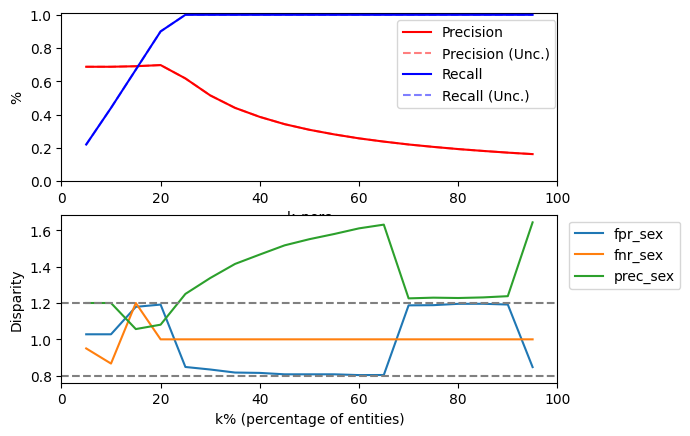

In [52]:
fo.plot(x_scale_perc=True)

In [61]:
fo = FairnessEvaluator(data,
                      'G3',
                      'school', # sex
                      metrics=['fpr','fnr', 'tpr'],
                      metrics_to_plot=['fpr','fnr','prec'],
                      metric_fairness_bounds={'tpr':[0.9,1.1]},
                      fully_constrained=False,
                      precision_ub = 0.7)        
df = fo.evaluate()

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 549 small elements
Coin0506I Presolve 0 (-2) rows, 0 (-649) columns and 0 (-749) elements
Clp0000I Optimal - objective value 22.4
Coin0511I After Postsolve, objective 22.4, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 22.4 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 3.56621e-08 - average 5.09

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 549 small elements
Coin0506I Presolve 0 (-2) rows, 0 (-649) columns and 0 (-749) elements
Clp0000I Optimal - objective value 44.8
Coin0511I After Postsolve, objective 44.8, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 44.8 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 7.27783e-08 - average 1.03

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 1.03972e-07 - average 1.48531e-08, 0 fixed columns
Coin0506I Presolve 7 (0) rows, 3 (0) columns and 16 (0) elements
Clp0006I 0  Obj 67.9 Dual inf 200 (2)
Clp0029I End of values pass after 3 iterations
Clp0000I Optimal - objective value 67.9
Clp0000I Optimal - objective value 67.9
Clp0000I Optimal - objective value 67.9
Coin0511I After Postsolve, objective 67.9, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 67.9 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 3 columns (3 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.000 seconds, density: 0.000%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated


/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 7 (-1) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 0 - average 0, 0 fixed columns
Coin0506I Presolve 7 (0) rows, 3 (0) columns and 16 (0) elements
Clp0006I 0  Obj 90.3 Dual inf 200 (2)
Clp0029I End of values pass after 3 iterations
Clp0000I Optimal - objective value 90.3
Clp0000I Optimal - objective value 90.3
Clp0000I Optimal - objective value 90.3
Coin0511I After Postsolve, objective 90.3, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 90.3 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 3 columns (3 integer (0 of which binary)) and 16 elements
Coin3009W Conflict graph built in 0.000 seconds, density: 0.000%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc0012I Integer sol

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 9.6773e-09 - average 1.61288e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (3

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 549 small elements
Coin0506I Presolve 1 (-1) rows, 72 (-577) columns and 72 (-677) elements
Clp1000I sum of infeasibilities 0 - average 0, 72 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-72) columns and 0 (-72) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj -0 Dual inf 71.999928 (72)
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extende

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 9.67748e-09 - average 1.61291e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 549 small elements
Coin0506I Presolve 1 (-1) rows, 72 (-577) columns and 72 (-677) elements
Clp1000I sum of infeasibilities 0 - average 0, 72 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-72) columns and 0 (-72) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj -0 Dual inf 71.999928 (72)
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extende

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 9.67748e-09 - average 1.61291e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 9.67748e-09 - average 1.61291e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 9.67748e-09 - average 1.61291e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 9.67748e-09 - average 1.61291e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 6 rows, 3 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 9.67748e-09 - average 1.61291e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 9.67748e-09 - average 1.61291e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 2.21827e-08 - average 3.69711e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 2.21827e-08 - average 3.69711e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 2.21827e-08 - average 3.69712e-09, 1 fixed columns
Coin0506I Presolve 6 (0) rows, 2 (-1) columns and 12 (-4) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0004I processed model has 7 rows, 4 columns (

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 2.21831e-08 - average 3.69718e-09, 1 fixed columns
Coin0506I Presolve 5 (-1) rows, 2 (-1) columns and 10 (-6) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengt

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


Starting solution of the Linear programming relaxation problem using Primal Simplex

Clp0024I Matrix will be packed to eliminate 2945 small elements
Coin0506I Presolve 6 (-2) rows, 3 (-646) columns and 16 (-2231) elements
Clp1000I sum of infeasibilities 2.21831e-08 - average 3.69719e-09, 1 fixed columns
Coin0506I Presolve 5 (-1) rows, 2 (-1) columns and 10 (-6) elements
Clp0006I 0  Obj 100 Dual inf 200 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Clp0000I Optimal - objective value 100
Coin0511I After Postsolve, objective 100, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 100 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00

Starting MIP optimization
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengt

/usr/local/lib/python3.10/site-packages/FairnessEvaluator/evaluator.py:146: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results_df = self.results_df.append(r, ignore_index=True)


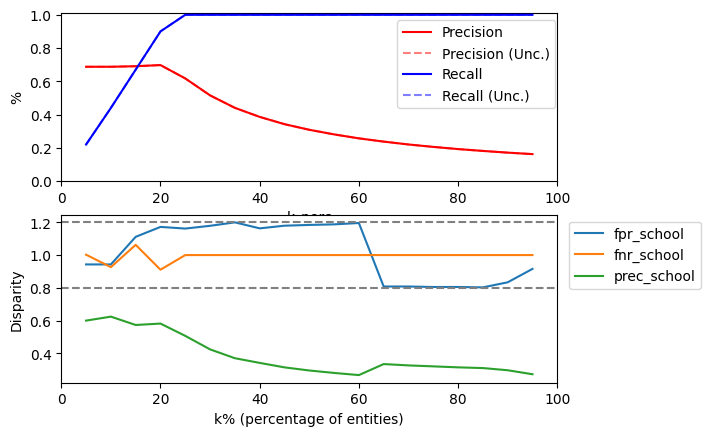

In [62]:
fo.plot(x_scale_perc=True)

# Heart Disease

In [76]:
data = pd.read_csv('/Users/Air/Downloads/cleveland.data')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 58079: invalid start byte